In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split

In [2]:
X, y = make_circles(n_samples=500, factor=0.1, noise=0.25,random_state=42)

In [8]:
y

array([1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,

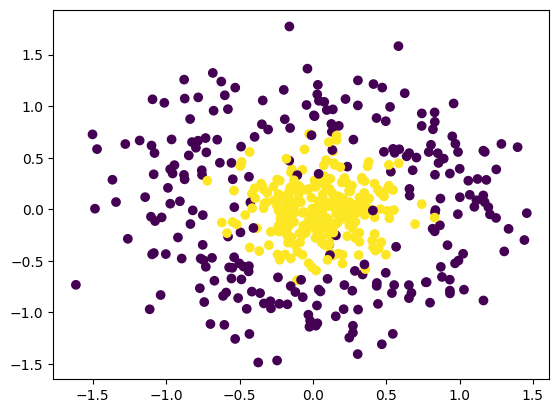

In [7]:
plt.scatter(X[:,0], X[:,1], c=y)

In [11]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

abc = AdaBoostClassifier()

np.mean(cross_val_score(abc, X, y, scoring='accuracy', cv=20))

0.916

In [13]:
abc.fit(X, y)

AdaBoostClassifier()

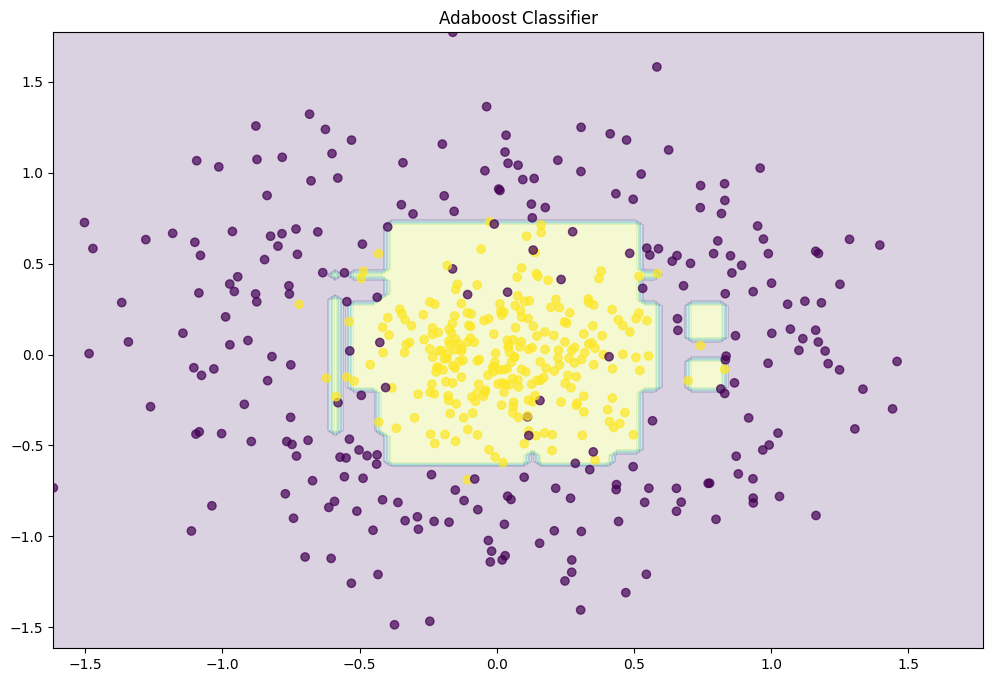

In [20]:
def plot_decision_boundary(clf):
    plt.figure(figsize=(12, 8))
    x_range = np.linspace(X.min(), X.max(), 100)
    xx1, xx2 = np.meshgrid(x_range, x_range)
    y_hat = clf.predict(np.c_[xx1.ravel(), xx2.ravel()])
    y_hat = y_hat.reshape(xx1.shape)
    plt.contourf(xx1, xx2, y_hat, alpha=0.2)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap="viridis", alpha=0.7)
    plt.title("Adaboost Classifier")
    plt.show()


plot_decision_boundary(abc)

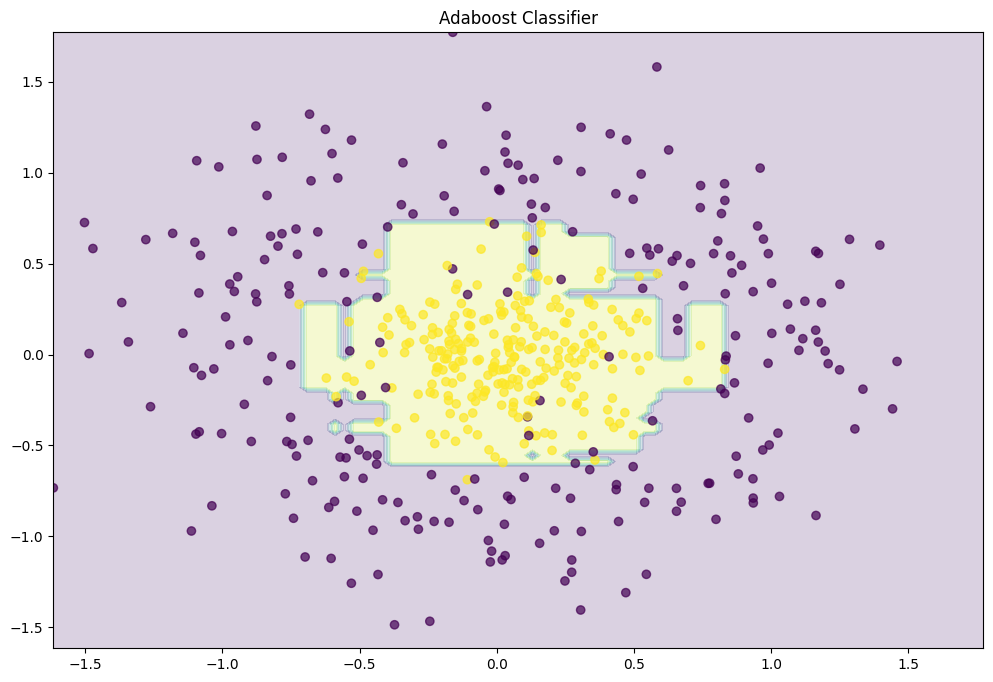

In [27]:
abc = AdaBoostClassifier(n_estimators=500, learning_rate=0.3)
abc.fit(X,y)
plot_decision_boundary(abc)

In [28]:
params = {
    "n_estimators": [100, 250, 500, 700, 1000],
    "learning_rate": [0.1, 0.4, 0.7, 1.0],
    "algorithm": ["SAMME", "SAMME.R"],
}

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
gs = GridSearchCV(AdaBoostClassifier(), param_grid=params, n_jobs=-1, cv=10, scoring='accuracy')
gs.fit(X,y)

GridSearchCV(cv=10, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.1, 0.4, 0.7, 1.0],
                         'n_estimators': [100, 250, 500, 700, 1000]},
             scoring='accuracy')

In [32]:
print("Best: %f using %s" % (gs.best_score_, gs.best_params_))

Best: 0.930000 using {'algorithm': 'SAMME', 'learning_rate': 0.4, 'n_estimators': 1000}
